# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import re
import json
import numpy as np
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',500)
pd.set_option('max_colwidth',800)
np.random.seed(42)

In [3]:
df1 = pd.read_csv("twitter-archive-enhanced.csv")
df1.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
#response.status_code

In [5]:
with open("image-predictions.tsv", mode='wb') as file:   
    file.write(response.content)

In [6]:
df2 = pd.read_csv("image-predictions.tsv", sep='\t')
print(df2.shape)
df2.head(2)

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
df3 = pd.read_json("tweet-json.txt", lines=True, encoding='utf-8')
df3 = df3[['id','favorite_count','retweet_count']]
print(df3.shape)
df3.head(2)

(2354, 3)


,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Assessing Data 1: See the data type of file "twitter-archive-enhanced.csv". Timestamp is in the type of object which must be in time..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_deno

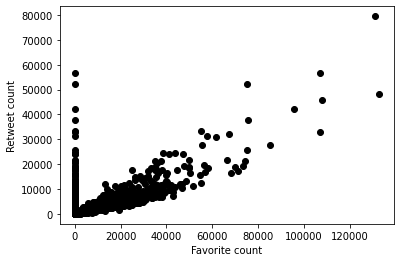

In [8]:
from colorama import Fore, Back, Style

print (Back.GREEN +'Assessing Data 1: See the data type of file "twitter-archive-enhanced.csv". Timestamp is in the type of object which must be in time..'+Style.RESET_ALL)
print ('')
print(df1.info())
print ('*'*50)
print (Back.GREEN +'Assessing Data 2: See the data of doggo, floofer etc. Dogo, floofer etc could be transfered to new column. In which, types of dog shown by their name and missing type represented by Type not defined'+Style.RESET_ALL)
print ('')
print(df1[['doggo','floofer','puppo','pupper']].head())
print ('*'*50)
print (Back.GREEN +'Assessing Data 3: In some cells of expanded_urls column, there are more than 1 similar links. It must be corrected'+Style.RESET_ALL)
print (df1['expanded_urls'].head(10))
print ('*'*50)
print (Back.GREEN +'Assessing Data 4: In the file of "tweet-json.txt". Remove the data contained zero favorite_count that does not follow the general linear relation with retweeted_count'+Style.RESET_ALL)
plt.plot(df3['favorite_count'],df3['retweet_count'],'ko')
plt.xlabel('Favorite count')
plt.ylabel('Retweet count')
print ('*'*50)
print(Back.GREEN +'Assessing Data 5: Unneccesary names of dogs such as "a","the" etc must be eliminated.'+Style.RESET_ALL)
print (df1['name'][df1['name'].apply(lambda s: s[0].islower())].head())
print ('*'*50)
print (Back.GREEN +'Assessing Data 6: Stats of rating_numerator and rating_denominator show the maximum range of their values and the most data concentrated.'+Style.RESET_ALL)
print (df1[['rating_numerator','rating_denominator']].describe())
print ('*'*50)
print (Back.GREEN+ 'Assessing Data 7: Incomplete detection of rating_numerator from the text column.'+Style.RESET_ALL)

regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''


df1['pattern'] = df1['text'].apply(get_pattern)
df1['fraction'] = df1['rating_numerator'].astype(str) + '/' + df1['rating_denominator'].astype(str)
print (df1[df1['pattern'] != df1['fraction']][['pattern', 'fraction']])
print ('*'*50)

### Quality issues
1. Doggo, Floofer, Puppo, Pupper are the different types of dog those have been saved in seperate columns. It would be better to take all the types of dog in One Column named "Types of dog"

2. Currently the column "name" consists of the name of dog. Although, algorithm had not detected all the names correctly as we have seen before. Therefore, the names started with lowercase letter is removed. 

3. Column "timestamp" is a combination of date and time. Here it would be more easily readable if I convert into the Month of the Year and Day of the week format in the seperate Columns

4. Column "expanded_urls" consists of link of the dogs. Although, some of the cells contained more than one same link. Here I removed all the repeated links into the cell.

5. By reading the "text" we have found out that some of the  "rating_numerator" is read wrong that only considered values after decimal. Therefore we need to apply pattern recognition method.

6. Remove the outliers of updated_rating_numerator according to the zscore test

7. Delete unnecessary columns

8. Remove the data contained zero favorite_count that does not follow the general linear log-log relation with retweeted_count

### Tidiness issues
1. Merge three different Dataframes into One on the basis of Unique variable "tweet_id" 

2. Not all data types are appropriate according to the form of data. E.g. timestamp should be in "datetime64", similarly None values in the columns of doggo, floofer etc do not attract much, these should be in the "boolean" data types. In which None represents FALSE and name represents TRUE.

3. Remove retweets.. i.e only keep records where retweeted_status_id is null

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [9]:
# Make copies of original pieces of data

df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()


## Issue #1:

#### Define Tidiness issue 1:
#### Merge three different Dataframes into One on the basis of Unique variable "tweet_id"

#### Code

In [10]:
result = pd.merge(df1[:], df2[['tweet_id', 'p1']], on='tweet_id', suffixes=('_left'))

df3 = df3.rename(columns={'id': 'tweet_id'})

df_new = pd.merge(result[:], df3[['tweet_id', 'favorite_count', 'retweet_count']], on='tweet_id', suffixes=('_left'))

df_new_copy = df_new.copy()

<ipython-input-10-d89c6d573c7a>:1: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  result = pd.merge(df1[:], df2[['tweet_id', 'p1']], on='tweet_id', suffixes=('_left'))
<ipython-input-10-d89c6d573c7a>:5: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_new = pd.merge(result[:], df3[['tweet_id', 'favorite_count', 'retweet_count']], on='tweet_id', suffixes=('_left'))


#### Test

In [11]:
df_new.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction,p1,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,13/10,13/10,orange,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,13/10,13/10,Chihuahua,33819,6514


## Issue #1:

#### Define Tidiness issue 2:
#### Remove retweets.. i.e only keep records where retweeted_status_id is null

#### Code

In [12]:
df_new = df_new[df_new['retweeted_status_id'].isnull()]

#### Test

In [13]:
print ('By removing retweets, our data has been decreased from',Back.GREEN,len(df_new_copy),Style.RESET_ALL,'to',Back.GREEN,len(df_new),Style.RESET_ALL )

By removing retweets, our data has been decreased from  2073  to  1994 


## Issue #2:

#### Define Quality Data issue 1: 
#### Doggo, Floofer, Puppo, Pupper are the different types of dog those have been saved in seperate columns. It would be better to take all the types of dog in One Column named "Types of dog"

#### Code

In [14]:
def combine_columns(row, columns):
    values = [str(row[column]) for column in columns if row[column] != 'None']
    return ' '.join(values)

df_new['Types of dog'] = df_new.apply(combine_columns, axis=1, args=(['doggo', 'floofer','puppo','pupper'],))

df_new['Types of dog'] = df_new['Types of dog'].apply(lambda x: 'Type not defined' if (x != 'doggo' and x != 'puppo' and x != 'floofer' and x!= 'pupper' and x!= 'doggo pupper' and x!= 'doggo floofer' and x!= 'doggo puppo') else x)

#### Test

In [15]:
df_new['Types of dog'].head(20)

0     Type not defined
1     Type not defined
2     Type not defined
3     Type not defined
4     Type not defined
5     Type not defined
6     Type not defined
7     Type not defined
8     Type not defined
9                doggo
10    Type not defined
11    Type not defined
12               puppo
13    Type not defined
14               puppo
15    Type not defined
16    Type not defined
17    Type not defined
18    Type not defined
19    Type not defined
Name: Types of dog, dtype: object

## Issue #3:

#### Define Quality Data issue 1: 
####    Not all data types are appropriate according to the form of data. E.g. timestamp should be in "datetime64", similarly None values in the columns of doggo, floofer etc do not attract much, these should be in the "boolean" data types. In which None represents FALSE and name represents TRUE.

#### Code

In [16]:

# changed data types of "retweeted_status_timestamp" and "timestamp" columns into "datetime64" 
df_new["retweeted_status_timestamp"] = df_new["retweeted_status_timestamp"].astype("datetime64")
df_new["timestamp"] = df_new["timestamp"].astype('datetime64')

# changed data types of All IDs into Object
df_new[['tweet_id','retweeted_status_id','retweeted_status_user_id','in_reply_to_status_id','in_reply_to_user_id']] = df_new[['tweet_id','retweeted_status_id','retweeted_status_user_id','in_reply_to_status_id','in_reply_to_user_id']].astype('object')

# change data type of "doggo", "floofer", "pupper", and "puppo" into "bool"
df_new["doggo"] = df_new["doggo"].apply(lambda x: 'True' if x == 'doggo' else 'False')
df_new["doggo"] = df_new["doggo"].map({'True': True, 'False': False})
df_new["floofer"] = df_new["floofer"].apply(lambda x: 'True' if x == 'floofer' else 'False')
df_new["floofer"] = df_new["floofer"].map({'True': True, 'False': False})
df_new["pupper"] = df_new["pupper"].apply(lambda x: 'True' if x == 'pupper' else 'False')
df_new["pupper"] = df_new["pupper"].map({'True': True, 'False': False})
df_new["puppo"] = df_new["puppo"].apply(lambda x: 'True' if x == 'puppo' else 'False')
df_new["puppo"] = df_new["puppo"].map({'True': True, 'False': False})

# changed data type of rating into float64
df_new[["rating_numerator","rating_denominator"]] = df_new[["rating_numerator","rating_denominator"]].astype('float64')


#### Test

In [17]:
df_new.info()
df_new.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1994 non-null   object        
 1   in_reply_to_status_id       23 non-null     object        
 2   in_reply_to_user_id         23 non-null     object        
 3   timestamp                   1994 non-null   datetime64[ns]
 4   source                      1994 non-null   object        
 5   text                        1994 non-null   object        
 6   retweeted_status_id         0 non-null      object        
 7   retweeted_status_user_id    0 non-null      object        
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]
 9   expanded_urls               1994 non-null   object        
 10  rating_numerator            1994 non-null   float64       
 11  rating_denominator          1994 non-null   float64     

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction,p1,favorite_count,retweet_count,Types of dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,False,False,False,False,13/10,13/10,orange,39467,8853,Type not defined
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,False,False,False,False,13/10,13/10,Chihuahua,33819,6514,Type not defined
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,False,False,False,False,12/10,12/10,Chihuahua,25461,4328,Type not defined


## Issue #4:

#### Define Quality Data issue 2:
#### Currently the column "name" consists of the name of dog. Although, algorithm had not detected all the names correctly as we have seen before. Therefore, the names started with lowercase letter is removed.

#### Code

In [18]:
df_new['name'] = df_new['name'].apply(lambda x: 'None' if x[0].islower() else x)
df_new = df_new.loc[~df_new['name'].str.contains('None')]

#### Test

In [19]:
df_new['name'].head(15)

0      Phineas
1        Tilly
2       Archie
3        Darla
4     Franklin
6          Jax
8         Zoey
9       Cassie
10        Koda
11       Bruno
13         Ted
14      Stuart
15      Oliver
16         Jim
17        Zeke
Name: name, dtype: object

## Issue #5:

#### Define Quality Data issue 3
#### Column "timestamp" is a combination of date and time. Here it would be more easily readable if I convert into the Month of the Year and Day of the week format in the seperate Columns

#### Code

In [20]:

# Extract the date values into a new "date" column
df_new["date"] = df_new["timestamp"].dt.date

# Extract the time values into a new "time" column
df_new["time"] = df_new["timestamp"].dt.time

# Extract the month and day
df_new['month'] = df_new['timestamp'].dt.month
df_new['day'] = df_new['timestamp'].dt.weekday


#### Test

In [21]:
df_new[['date','time','month','day']].head(5)

,date,time,month,day
0,2017-08-01,16:23:56,8,1
1,2017-08-01,00:17:27,8,1
2,2017-07-31,00:18:03,7,0
3,2017-07-30,15:58:51,7,6
4,2017-07-29,16:00:24,7,5


## Issue #6:

#### Define Quality Data issue 4
#### Column "expanded_urls" consists of link of the dogs. Although, some of the cells contained more than one same link. Here I removed all the repeated links into the cell.

#### Code

In [22]:
df_new['expanded_urls'] = df_new['expanded_urls'].str.split(',').str[0]

#### Test

In [23]:
df_new['expanded_urls'].head(5)

0    https://twitter.com/dog_rates/status/892420643555336193/photo/1
1    https://twitter.com/dog_rates/status/892177421306343426/photo/1
2    https://twitter.com/dog_rates/status/891815181378084864/photo/1
3    https://twitter.com/dog_rates/status/891689557279858688/photo/1
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1
Name: expanded_urls, dtype: object

## Issue #7:

#### Define Quality Data issue 5
#### By reading the "text" we have found out that some of the  "rating_numerator" is read wrong that only considered values after decimal.

#### Code

In [24]:
regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

          #[+-]?([0-9]*[.])?[0-9]+\/[+-]?([0-9]*[.])?[0-9]+
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''


df_new['pattern'] = df_new['text'].apply(get_pattern)
df_new['fraction'] = df_new['rating_numerator'].astype(str) + '/' + df_new['rating_denominator'].astype(str)
df_new[df_new['pattern'] != df_new['fraction']][['pattern', 'fraction']]

df_new[['updated_rating_numerator', 'updated_rating_denominator']] = df_new['pattern'].str.split('/', expand=True)
df_new[['updated_rating_numerator', 'updated_rating_denominator']] = df_new[['updated_rating_numerator', 'updated_rating_denominator']].astype('float64')


#### Test

   updated_rating_numerator  updated_rating_denominator
0                      13.0                        10.0
1                      13.0                        10.0
2                      12.0                        10.0
3                      13.0                        10.0
4                      12.0                        10.0


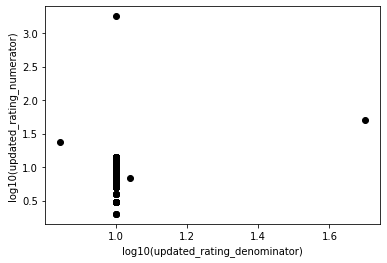

In [27]:
plt.plot(np.log10(df_new['updated_rating_denominator']),np.log10(df_new['updated_rating_numerator']),'ko')
plt.xlabel('log10(updated_rating_denominator)')
plt.ylabel('log10(updated_rating_numerator)')
print (df_new[['updated_rating_numerator','updated_rating_denominator']].head())

## Issue #8:

#### Define Quality Data issue 6:
#### Remove the outliers of updated_rating_numerator according to the zscore test

#### Code

In [28]:
from scipy import stats
z = np.abs(stats.zscore(df_new['updated_rating_numerator']))
# Set a threshold for which Z-scores to include
threshold = 3
df_new = df_new[(z < threshold)]

#### Test

1349 2073


C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


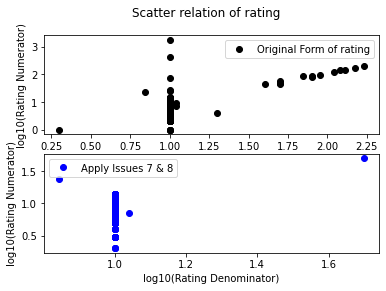

In [29]:
print (len(df_new['updated_rating_numerator']),len(df_new_copy['rating_numerator']))

fig, axs = plt.subplots(2, 1)

axs[0].plot(np.log10(df_new_copy['rating_denominator']),np.log10(df_new_copy['rating_numerator']),'ko',label='Original Form of rating')  # original form of rating
axs[0].legend()
axs[1].plot(np.log10(df_new['updated_rating_denominator']),np.log10(df_new['updated_rating_numerator']),'bo',label='Apply Issues 7 & 8')  # normalized rating by 10
fig.suptitle('Scatter relation of rating')
for ax in axs.flat:
    ax.set(xlabel='log10(Rating Denominator)', ylabel='log10(Rating Numerator)')
axs[1].legend()

## Issue #9:

#### Define Quality Data issue 7
#### Delete unnecessary columns

#### Code

In [30]:
df_new = df_new.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                                         'retweeted_status_timestamp','doggo','floofer','pupper','puppo','date','time',
                                         'rating_numerator','rating_denominator','text','source','pattern',	'fraction'])


#### Test

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 2042
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1349 non-null   object        
 1   timestamp                   1349 non-null   datetime64[ns]
 2   expanded_urls               1349 non-null   object        
 3   name                        1349 non-null   object        
 4   p1                          1349 non-null   object        
 5   favorite_count              1349 non-null   int64         
 6   retweet_count               1349 non-null   int64         
 7   Types of dog                1349 non-null   object        
 8   month                       1349 non-null   int64         
 9   day                         1349 non-null   int64         
 10  updated_rating_numerator    1349 non-null   float64       
 11  updated_rating_denominator  1349 non-null   float64     

## Issue #10:

#### Define Quality Data issue 8:
#### Remove the data contained zero favorite_count that does not follow the general linear log-log relation with retweeted_count

#### Code

In [32]:
'''Quality Data issue 8: remove the data contained zero favorite_count that does not follow the general linear 
log-log relation with retweeted_count
'''

df_new = df_new[df_new['favorite_count'] != 0]

#### Test

,tweet_id,timestamp,expanded_urls,name,p1,favorite_count,retweet_count,Types of dog,month,day,updated_rating_numerator,updated_rating_denominator
0,892420643555336193,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,orange,39467,8853,Type not defined,8,1,13.0,10.0
1,892177421306343426,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,Chihuahua,33819,6514,Type not defined,8,1,13.0,10.0
2,891815181378084864,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,Chihuahua,25461,4328,Type not defined,7,0,12.0,10.0
3,891689557279858688,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,paper_towel,42908,8964,Type not defined,7,6,13.0,10.0
4,891327558926688256,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin,basset,41048,9774,Type not defined,7,5,12.0,10.0


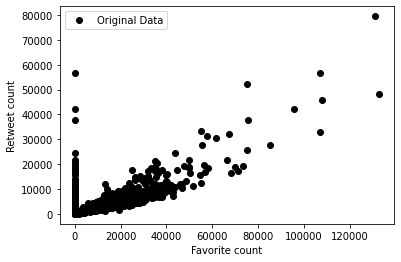

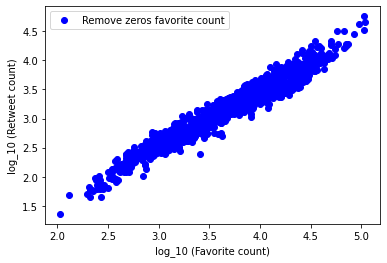

In [33]:
plt.figure()
plt.plot((df_new_copy['favorite_count']),(df_new_copy['retweet_count']),'ko',label='Original Data')
plt.legend()
plt.xlabel('Favorite count')
plt.ylabel('Retweet count')

plt.figure()
plt.plot(np.log10(df_new['favorite_count']),np.log10(df_new['retweet_count']),'bo',label='Remove zeros favorite count')
plt.legend()
plt.xlabel('log_10 (Favorite count)')
plt.ylabel('log_10 (Retweet count)')
df_new.head()

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [34]:
df_new.to_csv("storing_tweet_data.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Groupby the types of dog along with Favorite count, Retweet count as the sum and the rating_numerator as the mean.

2. Groupby the types of dog with the p1 as the count, also removed missing types and sort descending.

3. Regression analysis of the Favorite count versus Retweet count.

### Visualization: Find the frequency of the Type of dog. Also removed the data points those do not contained any type.

Pupper is 3.25 higher than Doggo


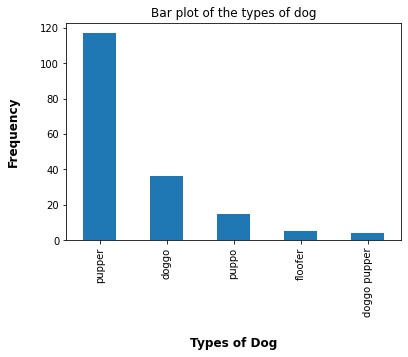

In [40]:
counts = df_new['Types of dog'].value_counts()
fig = plt.figure()
counts[1:].plot(kind='bar')
plt.title("Bar plot of the types of dog")
plt.xlabel("Types of Dog", labelpad=20, weight='bold', size=12)
plt.ylabel("Frequency", labelpad=20, weight='bold', size=12)
fig.savefig('barplot.png',dpi=300, bbox_inches='tight')

print ('Pupper is',counts[1]/counts[2],'higher than Doggo')

In [41]:
print (df_new.groupby('Types of dog')['favorite_count','retweet_count'].sum())
print (df_new.groupby('Types of dog')['updated_rating_numerator'].mean())


                  favorite_count  retweet_count
Types of dog                                   
Type not defined        10866281        3172562
doggo                     690506         208245
doggo pupper               36248          10247
floofer                    47795          11236
pupper                    867073         260190
puppo                     187826          50060
Types of dog
Type not defined    10.736561
doggo               12.083333
doggo pupper        11.750000
floofer             11.600000
pupper              10.267265
puppo               11.800000
Name: updated_rating_numerator, dtype: float64


<ipython-input-41-3dc7b8a805cc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print (df_new.groupby('Types of dog')['favorite_count','retweet_count'].sum())


In [42]:
group_count = df_new.groupby(['Types of dog', 'p1']).size().reset_index(name='Count')
filtered_df = group_count[~(group_count['Types of dog'] == 'Type not defined')]
sorted_df = filtered_df.sort_values('Count', ascending=False).head(20)
sorted_df

,Types of dog,p1,Count
351,pupper,golden_retriever,6
366,pupper,pug,5
284,doggo,golden_retriever,5
326,pupper,Pomeranian,4
318,pupper,Labrador_retriever,4
325,pupper,Pembroke,4
365,pupper,porcupine,3
312,pupper,French_bulldog,3
319,pupper,Lakeland_terrier,3
373,pupper,toy_poodle,3


In [43]:
import statsmodels.api as sm

X = np.log10(df_new["favorite_count"]) 
y = np.log10(df_new["retweet_count"]) 
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 2.153e+04
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:08:09   Log-Likelihood:                 922.33
No. Observations:                1349   AIC:                            -1841.
Df Residuals:                    1347   BIC:                            -1830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2341      0.023     -9.982      0.000      -0.280      -0.188
favorite_count     0.9222      0.006    146.727      0.000       0.910       0.934
==============================================================================
Omnibus:                        1.072   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                0.983
Skew:                          -0.061   Prob(JB):                        0.612
Kurtosis:                       3.053   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""